In [28]:
import sys
sys.path.append('../../utils')

import helpers as h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.style.use('default')
plt.rcParams.update({'font.size': 16})
%matplotlib inline

In [37]:
data = h.load_data(indexed=False)
all_stations = h.load_stations(data)

cleaned_data = h.clean_data(data, max_missing=121, max_alt=1000.0)
cleaned_stations = h.load_stations(cleaned_data)

,date,station,obs,t2m_mean,t2m_var,cape_mean,cape_var,sp_mean,sp_var,tcc_mean,...,str_var,d2m_mean,d2m_var,sm_mean,sm_var,lat,lon,alt,orog,doy
0,2007-01-03 00:00:00+00:00,0,5.5,3.616448,0.079733,11.480126,164.398999,101263.773906,17346.641356,46.793524,...,2.810124e+11,275.956692,0.151394,318.990796,6.543392,50.782700,6.0941,202.0,107.439461,-0.983798
1,2007-01-03 00:00:00+00:00,1,2.9,4.601281,0.107129,22.207007,207.708022,101463.529063,18411.594667,48.161629,...,2.771202e+11,275.529611,0.152089,325.635452,8.776818,52.485298,7.9126,65.0,47.632523,-0.983798
2,2007-01-03 00:00:00+00:00,2,3.3,2.873910,0.078148,44.308516,1438.915507,97942.360781,20106.971594,63.223506,...,4.909704e+11,275.008204,0.075718,336.861672,5.635509,50.744598,9.3450,300.0,348.869904,-0.983798
3,2007-01-03 00:00:00+00:00,3,8.0,7.465235,0.044571,2.181667,10.211634,101725.180000,16362.161305,53.057116,...,1.108749e+11,276.674669,0.095350,NaN,NaN,53.861698,8.1266,32.0,-0.193003,-0.983798
4,2007-01-03 00:00:00+00:00,4,3.4,2.718213,0.198263,96.170580,2550.754359,98045.333437,19122.337645,73.738330,...,7.963386e+11,274.732042,0.186014,324.187435,13.339768,51.088100,12.9326,296.0,296.839203,-0.983798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808680,2016-12-31 00:00:00+00:00,530,-0.6,-0.155651,0.978417,0.201357,0.141017,102826.477656,9997.686018,49.609571,...,1.132820e+12,271.254705,1.372146,245.919016,17.199589,52.715599,7.3176,19.0,36.652340,-0.973264
1808940,2016-12-31 00:00:00+00:00,531,-5.3,-3.497557,0.172615,0.003596,0.000317,96513.425000,4798.146479,0.186227,...,1.159146e+11,266.253950,0.827402,395.544220,22.223388,48.441799,9.9216,593.0,532.696167,-0.973264
1808533,2016-12-31 00:00:00+00:00,532,-2.7,-1.661223,0.163165,0.021574,0.006121,102359.503125,8667.898487,7.431432,...,1.425973e+11,269.773757,0.461191,253.349395,13.011937,51.841801,8.0607,104.0,95.691666,-0.973264
1808941,2016-12-31 00:00:00+00:00,533,-1.5,-5.979924,0.349577,0.000000,0.000000,95704.712813,4314.376743,1.796408,...,6.356090e+10,263.174088,0.838257,353.039061,22.348963,47.876099,10.5848,816.0,671.567078,-0.973264


In [30]:
removed_stations = all_stations[~all_stations['station'].isin(cleaned_stations['station'])].copy()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


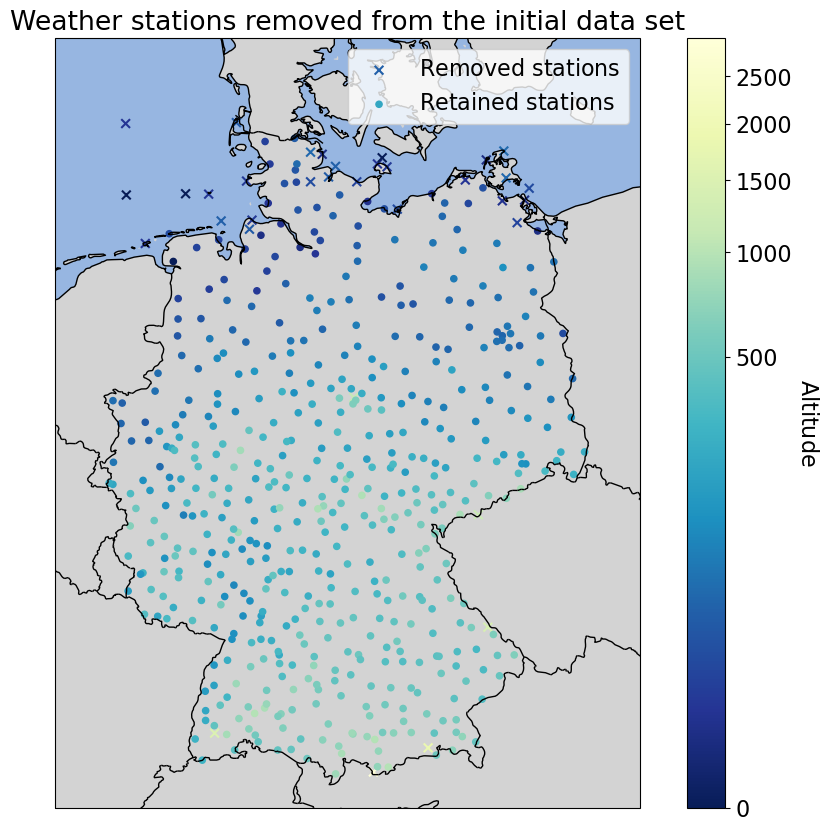

In [36]:
ax = h.plot_map()

cmap_nodes = plt.get_cmap('YlGnBu_r')
norm = plt.Normalize(min(all_stations.alt), max(all_stations.alt))

colors_1 = [cmap_nodes(norm(value)) for value in removed_stations.alt]
scatter1 = plt.scatter(removed_stations['lon'], removed_stations['lat'], marker='x', label=r'$\mathrm{removed\ stations}$', c=colors_1, s=40)

# Plotting cleaned stations with a different marker
colors_2 = [cmap_nodes(norm(value)) for value in cleaned_stations.alt]
scatter2 = plt.scatter(cleaned_stations['lon'], cleaned_stations['lat'], marker='o', label=r'$\mathrm{kept\ stations}$', c=colors_2, s=20)

# colorbar
sm_nodes = plt.cm.ScalarMappable(cmap=cmap_nodes, norm=norm)
colbar = plt.colorbar(sm_nodes, ax=ax)
colbar.ax.set_ylabel(r'$\mathrm{altitude}$', rotation=270, labelpad=20)

plt.legend()

## Fix the aspect ratio of the map
lat_center = (ax.get_extent()[2] + ax.get_extent()[3]) / 2
ax.set_aspect(1 / np.cos(np.radians(lat_center)))

plt.savefig("plots/stations_cleaned.eps", format="eps")